# How to train a word Embedding models in Python with Gensim

https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

In this notebook, we will learn how to train a word embedding model. To do this, we will use the library Gensim. 


In [1]:
!pip install --upgrade gensim

     |████████████████████████████████| 23.9MB 125kB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


To train a word embedding model, you need a large collection of texts. However, we will only use six sentences.
We need to tokenize each sentence.

In [6]:

import spacy
nlp = spacy.load("en_core_web_sm")

# define training data
texts=["Billy always listens to his mother", 
       "He always does what she says", 
       "If his mother says, 'Brush your teeth' Billy brushes his teeth", 
       "If his mother says, 'Go to bed' Billy goes to bed", 
       "Billy is a very good boy", 
       "A good boy listens to his mother"] 

sentences=[]
for text in texts: 
    doc = nlp(text)
    tokens=[]
    for token in doc:
        #if token.is_alpha:
        tokens.append(token.text.lower())
        #tokens.append(token.lemma_.lower())
    sentences.append(tokens)

print(sentences)


[['billy', 'always', 'listens', 'to', 'his', 'mother'], ['he', 'always', 'does', 'what', 'she', 'says'], ['if', 'his', 'mother', 'says', 'brush', 'your', 'teeth', 'billy', 'brushes', 'his', 'teeth'], ['if', 'his', 'mother', 'says', 'go', 'to', 'bed', 'billy', 'goes', 'to', 'bed'], ['billy', 'is', 'a', 'very', 'good', 'boy'], ['a', 'good', 'boy', 'listens', 'to', 'his', 'mother']]


In [7]:
from gensim.models import Word2Vec

# train model
#model = Word2Vec(sentences, min_count=2) 
#100-200-300, 30.
model = Word2Vec(sentences, vector_size=10, min_count=1, epochs=100)#min_count=2, ignore all words with a frequency < 2
word_vectors = model.wv
print(model)

Word2Vec(vocab=24, vector_size=10, alpha=0.025)


/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


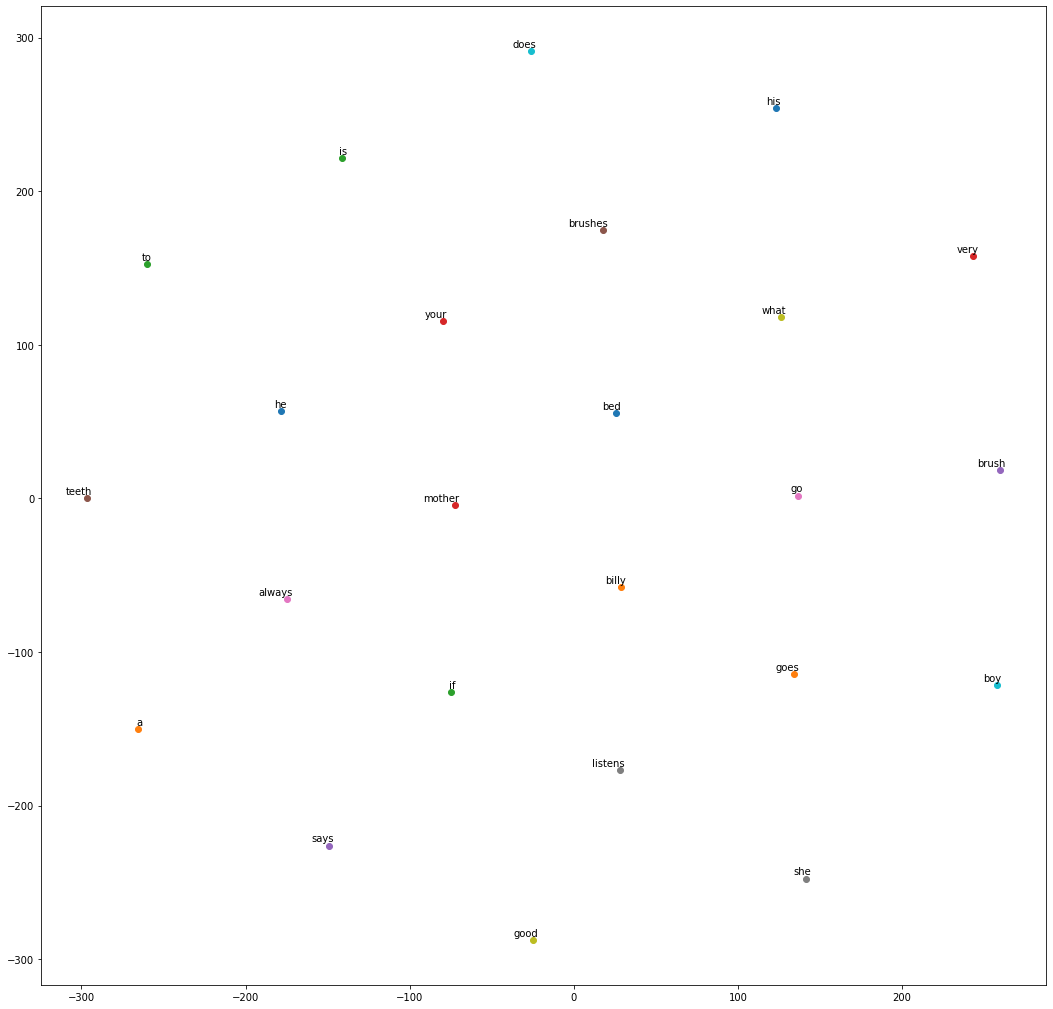

In [8]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def tsne_plot(word_vectors):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    words=list(word_vectors.index_to_key)
    for word in words:
        tokens.append(word_vectors[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
   
tsne_plot(word_vectors)

You can save the model. You can also load a pre-trained model.

In [10]:
from gensim.models import KeyedVectors
word_vectors.save('model.bin')
word_vectors = KeyedVectors.load('model.bin')
print("vector for mother:", word_vectors['mother'])


vector for mother: [-0.07797089 -0.01261329  0.09934832 -0.07494011 -0.01722945 -0.02046324
  0.09304017 -0.05163182 -0.01002556 -0.04271164]


In [11]:
similarity = word_vectors.similarity('mother', 'teeth')
print(similarity)

0.16853882


In [12]:
similarity = word_vectors.similarity('brush', 'brushes')
print(similarity)

0.7392078


## How to use a pre-trained word embedding model

In [13]:
import gensim.downloader as api
word_vectors = api.load("glove-wiki-gigaword-100")  # load pre-trained word-vectors from gensim-data


[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
vector = word_vectors['mother']  # numpy vector of a word
print(vector.shape)

(100,)


In [ ]:
word_vectors.most_similar('aspirin')


[('ibuprofen', 0.8141189217567444),
 ('tamoxifen', 0.7157070636749268),
 ('pills', 0.7089155316352844),
 ('statins', 0.6964315176010132),
 ('medication', 0.6923385262489319),
 ('nsaids', 0.6912236213684082),
 ('medications', 0.6864854693412781),
 ('pill', 0.6833402514457703),
 ('antidepressants', 0.6831307411193848),
 ('acetaminophen', 0.6780716776847839)]

In [ ]:
word_vectors.most_similar('coronavirus')


[('coronaviruses', 0.5618978142738342),
 ('pterosaur', 0.5322613716125488),
 ('norovirus', 0.5284952521324158),
 ('sars', 0.5270360112190247),
 ('prions', 0.5089951157569885),
 ('vcjd', 0.5069026350975037),
 ('hiv-1', 0.49967360496520996),
 ('h9n2', 0.4788110852241516),
 ('h5n1', 0.47352954745292664),
 ('prion', 0.47268733382225037)]

In [ ]:
result = word_vectors.similar_by_word("mother") #cat
for r in result:
    print(r)

#most_similar_key, similarity = result[0]  # look at the first match
#print(f"{most_similar_key}: {similarity:.4f}")

('daughter', 0.9063109755516052)
('wife', 0.9025879502296448)
('grandmother', 0.8934443593025208)
('father', 0.8656660318374634)
('sister', 0.8647424578666687)
('husband', 0.8470974564552307)
('woman', 0.827568769454956)
('her', 0.8250683546066284)
('aunt', 0.8055843114852905)
('daughters', 0.7969927191734314)


In [ ]:
w1="media"
distance = word_vectors.distance(w1, w1)
print(f"{distance:.1f}")


0.0


In [ ]:
distance = word_vectors.distance("woman", "man")
similarity = word_vectors.similarity('woman', 'man')
print(f"{distance:.1f}",f"{similarity:.1f}")


0.2 0.8


In [ ]:
distance = word_vectors.distance("woman", "house")
similarity = word_vectors.similarity('woman', 'house')
print(f"{distance:.1f}",f"{similarity:.1f}")


0.5 0.5


In [ ]:
distance = word_vectors.distance("woman", "wife")
similarity = word_vectors.similarity('woman', 'wife')
print(f"{distance:.1f}",f"{similarity:.1f}")

0.2 0.8


In [ ]:
distance = word_vectors.distance("man", "husband")
similarity = word_vectors.similarity('man', 'husband')
print(f"{distance:.1f}",f"{similarity:.1f}")

0.3 0.7


In [ ]:
distance = word_vectors.distance("man", "cosine")
similarity = word_vectors.similarity('man', 'cosine')
print(f"{distance:.1f}",f"{similarity:.1f}")


1.1 -0.2


In [ ]:
# Check the "most similar words", using the default "cosine similarity" measure.
result = word_vectors.most_similar(positive=['woman', 'king'], negative=['man'])
most_similar_key, similarity = result[0]  # look at the first match
print(f"{most_similar_key}: {similarity:.4f}")


In [ ]:
text1 = 'The hotel was very expensive and not good'.lower().split()
text2 = 'The hotel was very good and not expensive'.lower().split()
text3 = 'The best result was achieved by BERT'.lower().split()

distance = word_vectors.wmdistance(text1, text2)
print(f"{distance:.4f}")

distance = word_vectors.wmdistance(text1, text3)
print(f"{distance:.4f}")

0.0000
0.6942


In [ ]:

sentence_president = 'The president greets the press in Chicago'.lower().split()


sentence_obama = 'Obama speaks to the media in Illinois'.lower().split()
sentence_president3 = 'The president greets the media in Illinois'.lower().split()

distance = word_vectors.wmdistance(sentence_obama, sentence_president)
print(f"{distance:.4f}")

distance = word_vectors.wmdistance(sentence_obama, sentence_president3)
print(f"{distance:.4f}")


0.6182
0.3908


In [ ]:
similarity = word_vectors.n_similarity(['sushi', 'shop'], ['japanese', 'restaurant'])
print(f"{similarity:.4f}")

0.7067


In [ ]:
similarity = word_vectors.n_similarity(['blue', 'red'], ['japanese', 'restaurant'])
print(f"{similarity:.4f}")

0.4352


In [ ]:
similarity = word_vectors.n_similarity(['sushi', 'red'], ['blue', 'restaurant'])
print(f"{similarity:.4f}")

0.8065


In [ ]:
print(word_vectors.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


In [ ]:
print(word_vectors.doesnt_match("car ship woman train".split()))

woman


In [ ]:
# Use a different similarity measure: "cosmul".
result = word_vectors.most_similar_cosmul(positive=['woman', 'king'], negative=['man'])
most_similar_key, similarity = result[0]  # look at the first match
print(f"{most_similar_key}: {similarity:.4f}")


queen: 0.8965


In [ ]:
result = word_vectors.most_similar_cosmul(positive=['madrid', 'france'], negative=['spain'])
most_similar_key, similarity = result[0]  # look at the first match
print(f"{most_similar_key}: {similarity:.4f}")


paris: 0.9525


Find the top-N most similar words, using the multiplicative combination objective proposed by Omer Levy and Yoav Goldberg in [R10], 3CosMu. 

Positive words still contribute positively towards the similarity, negative words negatively, but with less susceptibility to one large distance dominating the calculation.

In [ ]:
result = word_vectors.most_similar_cosmul(positive=['baghdad', 'england'], negative=['london'])
most_similar_key, similarity = result[0]  # look at the first match
print(f"{most_similar_key}: {similarity:.4f}")

iraq: 0.8781


In [ ]:
result = word_vectors.most_similar_cosmul(positive=['spain', 'barcelona'], negative=['madrid'])
most_similar_key, similarity = result[0]  # look at the first match
print(f"{most_similar_key}: {similarity:.4f}")

portugal: 0.9031


In [ ]:

tsne_plot(word_vectors)